# Exploratory Data Analysis

The main objectives for this notebook are:
- Perform univariate analysis on target and feature variables to understand their distributions
- Investigate the relationship of the target variable with the feature variables using bivariate analysis
- Prepare for feature engineering and machine learning

In [21]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [22]:
df = pd.read_csv('../data/Iranian_churn_cleaned.csv')
df

,call_fails,complained,sub_length,charge_amt,seconds_used,usage_freq,sms_freq,unique_contacts_called,tariff_plan,status,age,cust_value,churn
0,8,False,38,0,4370,71,5,17,Pay-as-you-go,Active,30,197.640,False
1,0,False,39,0,318,5,7,4,Pay-as-you-go,Inactive,25,46.035,False
2,10,False,37,0,2453,60,359,24,Pay-as-you-go,Active,30,1536.520,False
3,10,False,38,0,4198,66,1,35,Pay-as-you-go,Active,15,240.020,False
4,3,False,38,0,2393,58,2,33,Pay-as-you-go,Active,15,145.805,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,17,False,17,1,9237,177,80,42,Pay-as-you-go,Active,55,261.210,False
2846,13,False,18,4,3157,51,38,21,Pay-as-you-go,Active,30,280.320,False
2847,8,True,11,2,1792,25,7,9,Pay-as-you-go,Active,30,100.680,True
2848,26,False,38,9,10740,99,8,44,Contractual,Active,55,174.585,False


Additional variable information:
- call_fails: number of call failures
- complained: bool (0: No complaint, 1: complaint)
- sub_length: total months of subscription
- charge_amt: Ordinal attribute (0: lowest amount, 9: highest amount)
- seconds_used: total seconds of calls
- usage_freq: total number of calls
- sms_freq: total number of text messages
- unique_contacts_called: total number of distinct phone calls
- tariff_plan: categorical (1: Pay as you go, 2: contractual)
- status: categorical (1: active, 2: non-active)
- age: continuous
- churn: bool (1: churn, 0: non-churn) - Class label
- cust_value: The calculated value of customer

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2850 entries, 0 to 2849
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   call_fails              2850 non-null   int64  
 1   complained              2850 non-null   bool   
 2   sub_length              2850 non-null   int64  
 3   charge_amt              2850 non-null   int64  
 4   seconds_used            2850 non-null   int64  
 5   usage_freq              2850 non-null   int64  
 6   sms_freq                2850 non-null   int64  
 7   unique_contacts_called  2850 non-null   int64  
 8   tariff_plan             2850 non-null   object 
 9   status                  2850 non-null   object 
 10  age                     2850 non-null   int64  
 11  cust_value              2850 non-null   float64
 12  churn                   2850 non-null   bool   
dtypes: bool(2), float64(1), int64(8), object(2)
memory usage: 250.6+ KB


In [5]:
df.describe()

,call_fails,sub_length,charge_amt,seconds_used,usage_freq,sms_freq,unique_contacts_called,age,cust_value
count,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,7.802456,32.452982,0.974737,4534.243158,70.484912,73.789825,23.870526,31.077193,474.990367
std,7.326172,8.723075,1.550618,4199.712303,57.401512,112.062397,17.193929,8.861934,514.442198
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000
25%,1.000000,29.000000,0.000000,1458.750000,28.000000,7.000000,11.000000,25.000000,117.527500
50%,6.000000,35.000000,0.000000,3041.000000,54.500000,22.000000,21.000000,30.000000,232.520000
75%,12.000000,38.000000,2.000000,6500.000000,96.000000,88.000000,34.000000,30.000000,790.080000
max,36.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,55.000000,2165.280000


# Univariate analysis

In [6]:
sns.set_style("whitegrid")

churn
False    0.843509
True     0.156491
Name: proportion, dtype: float64


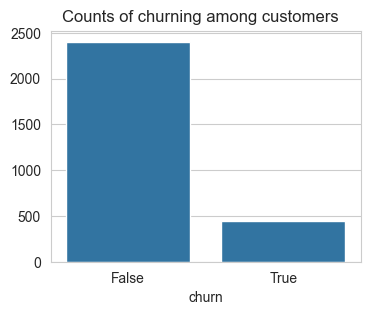

In [7]:
fig, ax = plt.subplots(figsize=(4,3))
sns.countplot(x='churn', data=df)
plt.ylabel('')
plt.suptitle('Counts of churning among customers', x=0.5, y=0.95)

values_churn = df.value_counts('churn', normalize=True)
print(values_churn)

**Observations**
- One-sixth have terminated the company's services. Churn is also our target variable for the dataset.

In [23]:
def draw_mean_median(dataframe, axes, i):
    """
    Function for drawing a mean and median line.
    Arg: df['column']
    """
    axes[(i//3), (i%3)].axvline(x=np.mean(dataframe),
            color='red',
            label='mean')
    axes[(i//3), (i%3)].axvline(x=np.median(dataframe),
            color='green',
            ls='--',
            label='median')
    print(str(i//3), (i%3), '| mean: ', np.mean(dataframe), ' | median:', np.median(dataframe))

0 0 | mean:  7.802456140350877  | median: 6.0
0 1 | mean:  32.452982456140354  | median: 35.0
0 2 | mean:  0.9747368421052631  | median: 0.0
1 0 | mean:  4534.243157894737  | median: 3041.0
1 1 | mean:  70.48491228070175  | median: 54.5
1 2 | mean:  73.7898245614035  | median: 22.0
2 0 | mean:  23.870526315789473  | median: 21.0
2 1 | mean:  31.07719298245614  | median: 30.0
2 2 | mean:  474.99036666666666  | median: 232.52


Text(0.5, 0.92, 'Distributions of numerical columns')

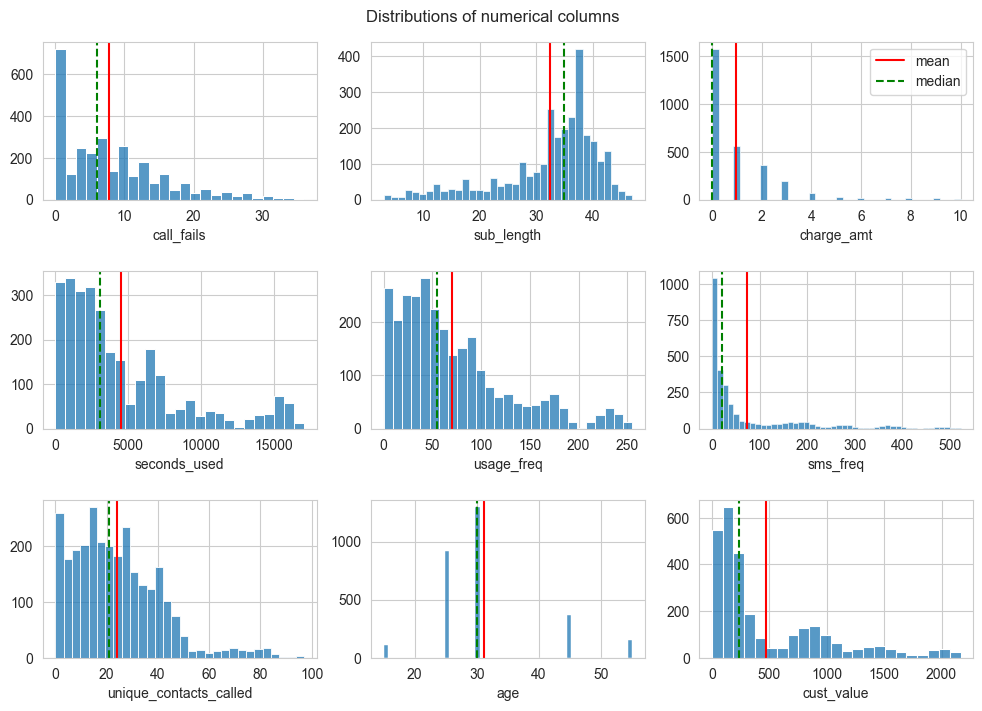

In [24]:
num_list = list(['call_fails', 'sub_length', 'charge_amt', 'seconds_used', 'usage_freq', 'sms_freq', 'unique_contacts_called', 'age', 'cust_value'])

fig1, axes = plt.subplots(3, 3, figsize=(12,8))

for i, num_col in enumerate(num_list):
    sns.histplot(x=df[num_col], ax=axes[(i//3), (i%3)])
    draw_mean_median(df[num_col], axes, i)
    axes[(i//3), (i%3)].set_ylabel('')


fig1.subplots_adjust(wspace=0.2, hspace=0.45)
axes[0,2].legend(loc='upper right')
fig1.suptitle('Distributions of numerical columns', x=0.5, y=0.92)

Since most of the distributions have a skew, I will be referring more to the median as the measure of central tendency, which is less sensitive to skewed distributions and outliers.

**General Observations**
- The distributions for call fails, seconds of use, usage frequency, sms frequency, unique contacts called, and customer value are all positively-skewed. Only the distribution for subscription length has a negative skew. 
- Charge amount is discrete numerical variable.

**Specific Observations**
1. The median for number of call failures is 6. 
2. Most of the customers have subscribed to the service for about 35 months.
3. The majority of customers pay for the lower-priced services offered by the company.

4. The median accumulated call time is 2990 seconds (almost 50 minutes), and 
5. the median total calls is 54.
6. A half of the users send below 21 messages.

7. A large chunk of the people have called about 21 unique contacts.
8. Most of the customers are in the age range 25-30.
9. Half of the customers have a customer value below 230.

complained
False    0.919298
True     0.080702
Name: proportion, dtype: float64
tariff_plan
Pay-as-you-go    0.919649
Contractual      0.080351
Name: proportion, dtype: float64
status
Active      0.76
Inactive    0.24
Name: proportion, dtype: float64


Text(0.5, 0.95, 'Distribution of Categorical Variables')

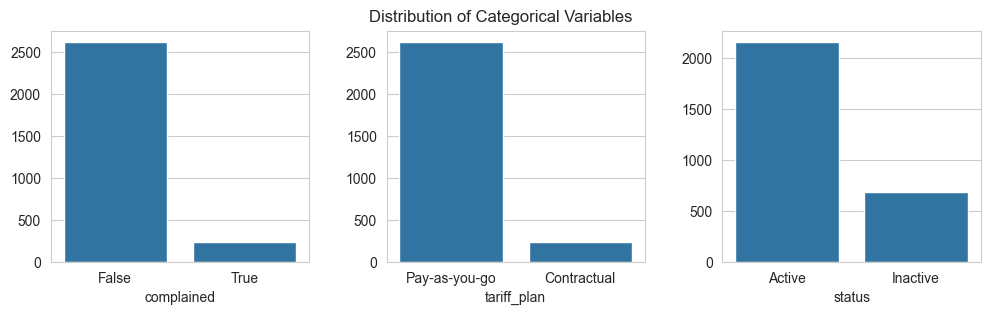

In [25]:
cat_list = list(['complained', 'tariff_plan', 'status'])

fig1, axes = plt.subplots(1, 3, figsize=(12,3))

for i, cat_col in enumerate(cat_list):
    sns.countplot(x=df[cat_col], data=df, ax=axes[i])
    axes[i].set_ylabel('')

    values_count = df.value_counts(cat_col, normalize=True)
    print(values_count)

fig1.subplots_adjust(wspace=0.3)
fig1.suptitle('Distribution of Categorical Variables', x=0.5, y=0.95)

**Observations**
- **8.07%** of the customers have complained.
- **92.0%** of the customers have prepaid plans.
- About **a quarter** of the customerbase **are inactive**.

# Bivariate Analysis

## Numeric Features

In [11]:
from scipy.stats import mannwhitneyu

def numerical_analysis(df, column): 
    result = mannwhitneyu(df[df['churn'] == True][column],
                          df[df['churn'] == False][column])

    print("Mann-Whitney U Test Results:")
    # print("U-statistic:", result.statistic)
    print("p-value:", result.pvalue)

    if result.pvalue < 0.05:
        print(f'There is a statistically significant relationship between {column} and churn.')
    else:
        print(f'There is no statistically significant relationship between {column} and churn.')

Mann-Whitney U Test Results:
p-value: 0.43313477834582126
There is no statistically significant relationship between call_fails and churn.


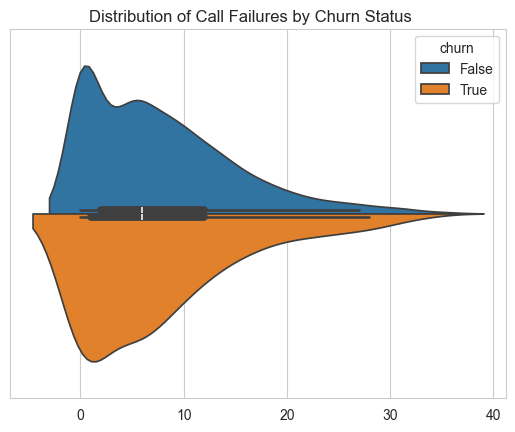

In [12]:
sns.violinplot(data=df, x='call_fails', hue='churn', split = True)
plt.xlabel('')
plt.suptitle('Distribution of Call Failures by Churn Status', x=0.5, y=0.92)

numerical_analysis(df, 'call_fails')

**Observation**
- The two violin plots show similar distributions, in terms of shape, the median, and IQRs. Call fails is not be a good indicator of churn.

In [13]:
from scipy.stats import chi2_contingency

def categorical_analysis(df, column):

    contingency_table = pd.crosstab(df[column], df['churn'])

    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Print the results
    print(f"P-value: {p}")
    print(expected)

    if p < 0.05:
        print(f'There is a statistically significant relationship between {column} and churn.')
    else:
        print(f'There is no statistically significant relationship between {column} and churn.')

P-value: 1.2662937233962688e-185


[[2209.99298246  410.00701754]
 [ 194.00701754   35.99298246]]
There is a statistically significant relationship between complained and churn.


Text(0.5, 0.92, 'Distribution of Customer Complaints by Churn Status')

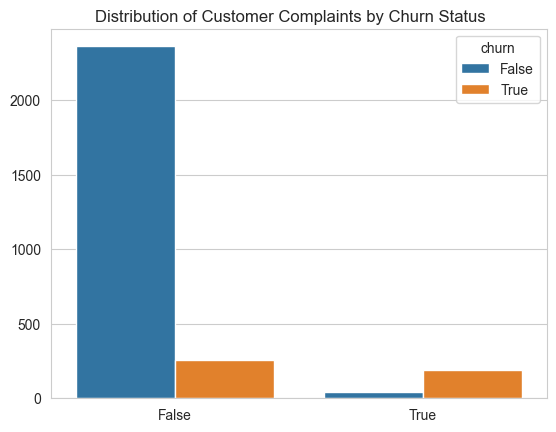

In [14]:
categorical_analysis(df, 'complained')

sns.countplot(data=df, x='complained', hue='churn')
plt.xlabel('')
plt.ylabel('')
plt.suptitle('Distribution of Customer Complaints by Churn Status', x=0.5, y=0.92)

**Observation**
- Customers who have not complained have a 9.77% churn rate.
- Customers who have complained have a whopping 82.6% churn rate.

**Implication**
- This is considered to be an important feature for modeling.

Mann-Whitney U Test Results:
p-value: 0.07770285281408061
There is no statistically significant relationship between sub_length and churn.


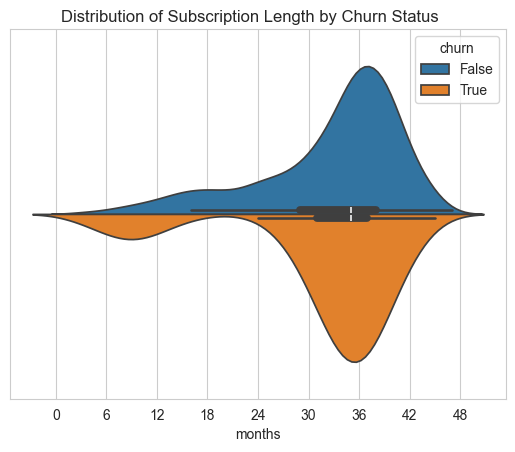

In [15]:
sub = sns.violinplot(data=df, x='sub_length', hue='churn', split = True)

max_sub_length = df['sub_length'].max()
xticks = np.arange(0, max_sub_length + 6, 6)  # Adjust the range to include max subscription length
plt.xticks(ticks=xticks)

plt.xlabel('months')
plt.suptitle('Distribution of Subscription Length by Churn Status', x=0.5, y=0.92)

numerical_analysis(df, 'sub_length')

**Observation**
- The distributions and medians are similar. This is not a strong feature to identify churn. 

Mann-Whitney U Test Results:
p-value: 6.017132713944325e-40
There is a statistically significant relationship between charge_amt and churn.


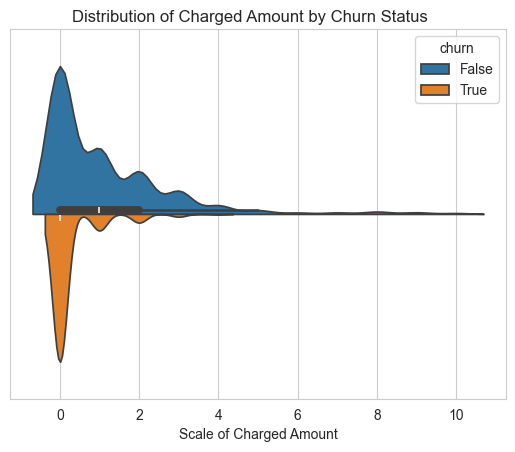

In [16]:
sns.violinplot(data=df, x='charge_amt', hue='churn', split = True)
plt.xlabel('Scale of Charged Amount')
plt.ylabel('')
plt.suptitle('Distribution of Charged Amount by Churn Status', x=0.5, y=0.92)

numerical_analysis(df, 'charge_amt')

**Observation**
- We can see here that customers who churn have only paid up to scale 4 charge. This indicates that churn is more likely to occur with customers on less expensive plans.

**Implication**
- We consider charge amount to be an important feature.

Mann-Whitney U Test Results:
p-value: 9.778589883752395e-83
There is a statistically significant relationship between minutes_used and churn.


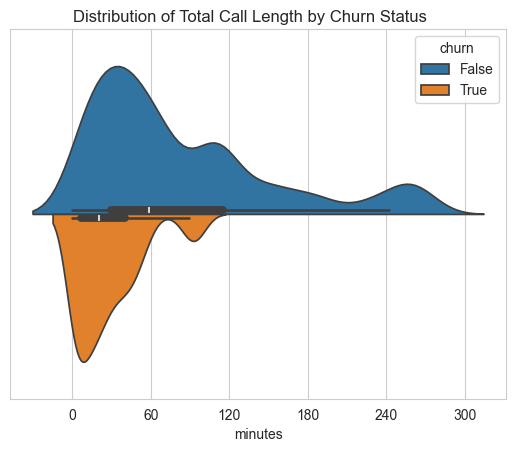

In [17]:
df['minutes_used'] = df['seconds_used'] // 60
sns.violinplot(data=df, x='minutes_used', hue='churn', split = True)

max_time_length = df['minutes_used'].max()
xticks = np.arange(0, max_time_length + 60, 60) # Adjust the range to include max subscription length
plt.xticks(ticks=xticks)

plt.xlabel('minutes')
plt.suptitle('Distribution of Total Call Length by Churn Status', x=0.5, y=0.92)

numerical_analysis(df, 'minutes_used')

**Observations**
- Churners' total call lenghts are generally less than those who did not churn, and the distribution is tighter for the churned people.
- Median and IQR values are also distinct.


**Implication**
- Call lengths are considered as important features.

Text(0.5, 0.92, 'Distribution of Usage Frequency by Churn Status')

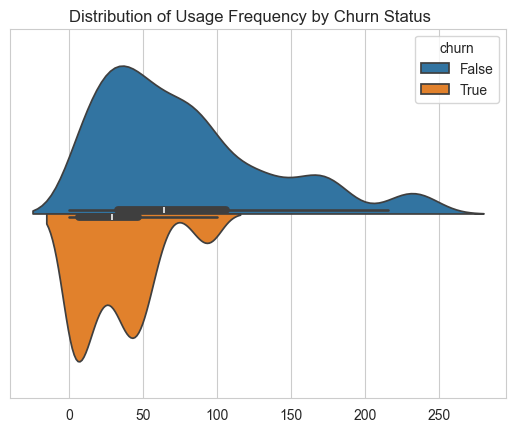

In [18]:
sns.violinplot(data=df, x='usage_freq', hue='churn', split = True)

plt.xlabel('')
plt.suptitle('Distribution of Usage Frequency by Churn Status', x=0.5, y=0.92)

**Observation**
- Churning customers have a narrower distribution and a less median value as well.

**Implication**
- Usage or call frequency is considered as an important feature.

c:\Users\Marco\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


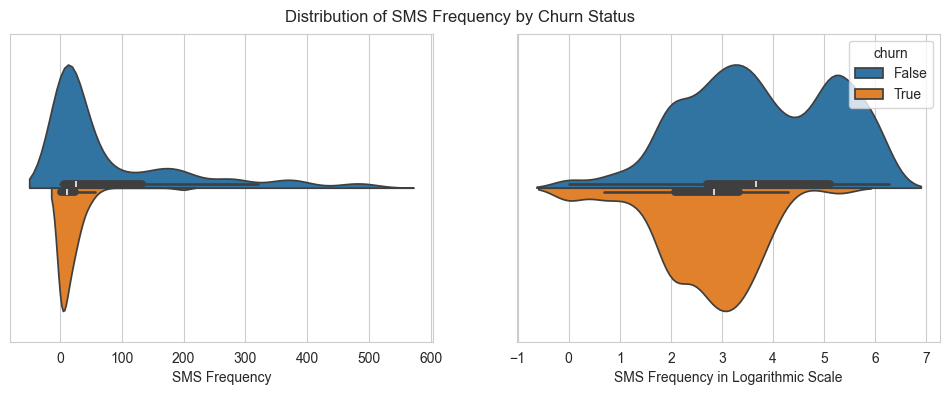

In [19]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.violinplot(data=df, x='sms_freq', hue='churn', split = True, ax=axes[0])
axes[0].set_xlabel('SMS Frequency')
axes[0].legend()
constant = 1e-9
df['log_sms_freq'] = np.log(df['sms_freq']) + constant

sns.violinplot(data=df, x='log_sms_freq', hue='churn', split = True, ax=axes[1])
axes[1].set_xlabel('SMS Frequency in Logarithmic Scale')

plt.suptitle('Distribution of SMS Frequency by Churn Status', x=0.5, y=0.94)
legend = axes[0].legend(loc='upper right')
legend.remove()

fig1.subplots_adjust(wspace=-0.2)

**Observation**
- The medians are close here and the distributions are alike too, but are different past 100 text messages (and consequently the IQR): there is a minor presence of churn only about 200 SMSs and non for the rest. On the other hand, the SMS for the non-churned customers are more prominent for those with more than 100 SMS.

**Implication**
- SMS frequency is a potential churn indicator.

Mann-Whitney U Test Results:
p-value: 2.4134103670814122e-54
There is a statistically significant relationship between unique_contacts_called and churn.


Text(0.5, 0.92, 'Distribution of Unique Contacts Called by Churn Status')

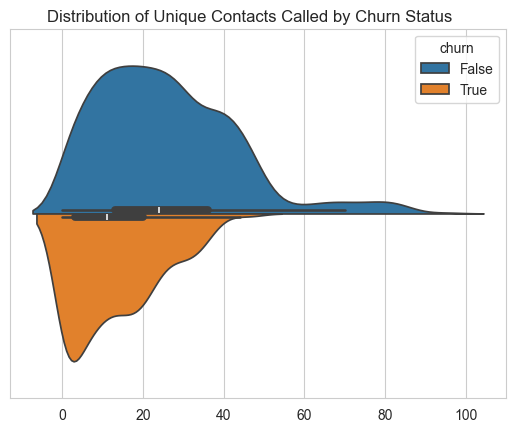

In [20]:
sns.violinplot(data=df, x='unique_contacts_called', hue='churn', split = True)
numerical_analysis(df, 'unique_contacts_called')

plt.xlabel('')
plt.suptitle('Distribution of Unique Contacts Called by Churn Status', x=0.5, y=0.92)

**Observation**
- Churning customers have had less unique contacts called in contrast to the non-churning customers.
- The churn distribution is positively-skewed, and has a lower mean than the non-churn distribution. Meanwhile, the non-churn distribution has a heavy distribution about its median, with a longer tail of close values from 60 to 80 unique contacts called.

**Implication**
- Consider unique contacts called as an important feature.

P-value: 2.6361297947005022e-08
[[ 193.16350877   35.83649123]
 [2210.83649123  410.16350877]]
There is a statistically significant relationship between tariff_plan and churn.


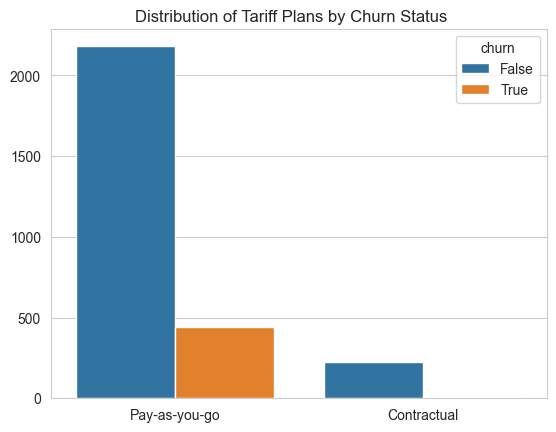

In [26]:
sns.countplot(data=df, x='tariff_plan', hue='churn')

plt.xlabel('')
plt.ylabel('')
plt.suptitle('Distribution of Tariff Plans by Churn Status', x=0.5, y=0.92)

# plan_vs_churn_tab = pd.crosstab(df['churn'], df['tariff_plan'])
# plan_vs_churn_tab = plan_vs_churn_tab / plan_vs_churn_tab.sum()
# plan_vs_churn_tab

categorical_analysis(df, 'tariff_plan')

**Observation**
- For this dataset, churn on prepaid plan is **16.7%**, while **2.62%** on contractual plans. The difference is 8-fold.

**Implication**
- The tariff plan is considered as an important feature.

P-value: 6.8645838862667365e-152
[[1827.04  338.96]
 [ 576.96  107.04]]
There is a statistically significant relationship between status and churn.


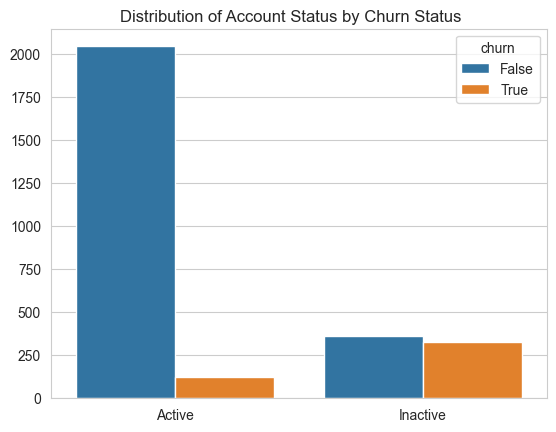

In [18]:
sns.countplot(data=df, x='status', hue='churn')

plt.xlabel('')
plt.ylabel('')
plt.suptitle('Distribution of Account Status by Churn Status', x=0.5, y=0.92)

# status_vs_churn_tab = pd.crosstab(df['churn'], df['status'])
# status_vs_churn_tab = status_vs_churn_tab / status_vs_churn_tab.sum()
# status_vs_churn_tab

categorical_analysis(df, 'status')

**Observation**
- Active accounts have a churn rate of **5.58%**, while inactive accounts have a significantly larger 47.5% churn rate.

**Implication**
- The status is considered as an important feature.

P-value: 1.1162941023358962e-10
[[  94.47298246   17.52701754]
 [ 776.87157895  144.12842105]
 [1093.18736842  202.81263158]
 [ 309.5677193    57.4322807 ]
 [ 129.90035088   24.09964912]]
There is a statistically significant relationship between age and churn.


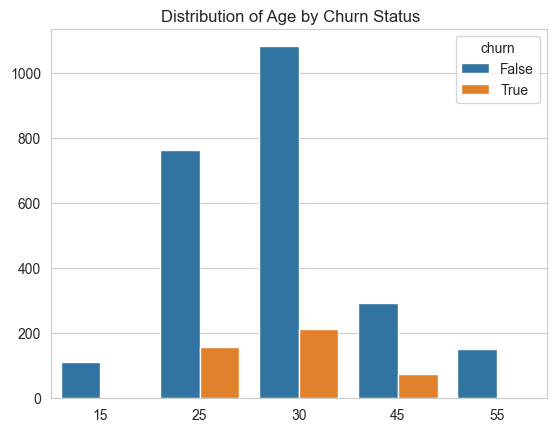

In [19]:
sns.countplot(x='age', hue='churn', data=df)

plt.xlabel('')
plt.ylabel('')
plt.suptitle('Distribution of Age by Churn Status', x=0.5, y=0.92)

# status_vs_churn_tab = pd.crosstab(df['churn'], df['age'])
# status_vs_churn_tab = status_vs_churn_tab / status_vs_churn_tab.sum()
# status_vs_churn_tab

categorical_analysis(df, 'age')

**Observations**
- Almost all the churners are from the ages 25, 30, and 45 with churn rates **17.0%**, **16.4%**, and **20.2%**.
- There is **0.00%** churn rate from age 15 and **1.30%** for age 55.

**Implication**
- Age is not considered as an important feature.

Text(0.5, 0.92, 'Distribution of Customer Value by Churn Status')

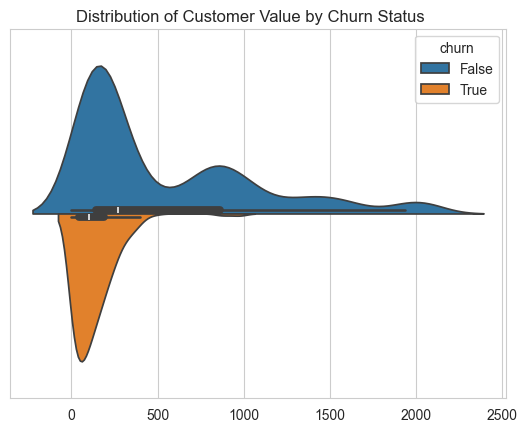

In [53]:
sns.violinplot(data=df, x='cust_value', hue='churn', split = True)

plt.xlabel('')
plt.suptitle('Distribution of Customer Value by Churn Status', x=0.5, y=0.92)

**Observation**
- The distributions are most different beyond customer value 500. Churning customers tend to have a value less than 500, while for non-churning customers, there is more variability for their customer values.

**Implication** 
- Customer value is considered as an important feature.

# Multivariate Analysis

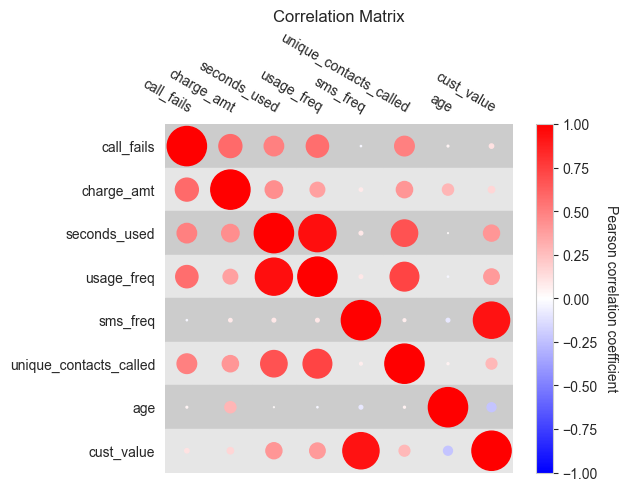

In [29]:
num_list = list(['call_fails', 'charge_amt', 'seconds_used', 'usage_freq', 'sms_freq', 'unique_contacts_called', 'age', 'cust_value'])
correl_data = df[num_list]
correl_matrix = correl_data.corr()

from psynlig import plot_correlation_heatmap

kwargs = {
    'heatmap': {
        'vmin': -1,
        'vmax': 1,
        'cmap': 'bwr',
    }
}

plot_correlation_heatmap(correl_data, bubble=True, annotate=False, **kwargs)

plt.title('Correlation Matrix')
plt.show()

**Observations**
- From a common sense standpoint, it makes sense that usage (call) frequency is highly correlated with total length of calls. More calls leads to longer total call length. 
- I assume that the customer activity is one of the components when computing the customer value, but it happens that SMS frequency has the highest correlation with customer value.

**Action**
- We have multicollinearity, so we'll use the variance inflation factor.

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# sub_length and age is removed
X = df[num_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                  Feature        VIF
0              call_fails   4.763857
1              charge_amt   2.991068
2            seconds_used  33.415250
3              usage_freq  37.678396
4                sms_freq  35.852976
5  unique_contacts_called   6.822861
6                     age   3.357442
7              cust_value  53.795913


For trial purposes, I will remove usage_freq and cust_value for the following reasons: 
- seconds_used is more skewed than usage_freq; and 
- sms_freq is the independent variable in contrast to the cust_value.

In [31]:
# usage_freq, cust_value is removed
X = df[['call_fails', 'charge_amt', 'seconds_used', 'sms_freq', 'unique_contacts_called', 'age']]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                  Feature       VIF
0              call_fails  3.691054
1              charge_amt  2.226714
2            seconds_used  4.319944
3                sms_freq  1.397859
4  unique_contacts_called  5.609631
5                     age  2.967834


A VIF of 0-5 indicates low correlation. I think we have found our features!

## Condition Index

In [35]:

cond_corr = df[num_list]
cond_correl_matrix = cond_corr.corr()

# Calculate eigenvalues of the correlation matrix
eigenvalues, _ = np.linalg.eig(cond_correl_matrix)
print("Eigenvalues of the correlation matrix:", eigenvalues)

condition_index = np.sqrt(eigenvalues.max() / eigenvalues)
print("Condition Index:", condition_index)

Eigenvalues of the correlation matrix: [3.54341974 1.86517984 1.0955363  0.72019917 0.3507975  0.3762185
 0.03842712 0.01022183]
Condition Index: [ 1.          1.37832281  1.79844812  2.21811977  3.17821339  3.06895997
  9.60267772 18.61859941]


# Recap
- The following numerical variables are considered as good predictors for churn: complained, charge_amt, seconds_used, usage_freq, sms_freq, unique_contacts_called, cust_value.
- For the categorical variables, potential predictors are: complained, tariff_plan, status, age bracket (as ordinal categorical).
- Reconsider dropping features vs. combining using PCA or using feature selection methods.